In [1]:
# uniquement pour utliser dans colab : 

# !git clone https://github.com/CarinePivoteau/Alea2023Notebooks.git
# import sys
# sys.path.append('/content/Alea2023Notebooks')

In [2]:
# si les modules ne sont pas installés :

# import sys
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install graphviz

In [3]:
# imports : random, time, math, sys, plt, graphviz

from helpers import *

In [4]:
# M = Z + Z x Cyc(M) => M = Z + Z x C, tC = S x tM, S = 1 + M x S 

# calcul des coefficients non normalisés (entiers)
cmax = 600
cM = [0]
cC = [1]
cS = [1]

for i in range(1,cmax+1):
    cM.append(i*cC[i-1])
    cC.append(sum(math.comb(i,k) * cS[i-k] * k * cM[k] // i for k in range(1,i+1)))
    cS.append(sum(math.comb(i,k) * cS[i-k] * cM[k] for k in range(1,i+1)))

print('M ', cM[:10])
print('C ', cC[:10])
print('S ', cS[:10])
print()
print('tM', [i*cM[i] for i in range(10)]) # tM

M  [0, 1, 2, 9, 68, 730, 10164, 173838, 3524688, 82627200]
C  [1, 1, 3, 17, 146, 1694, 24834, 440586, 9180800, 219829536]
S  [1, 1, 4, 27, 260, 3270, 50904, 946134, 20462896, 505137312]

tM [0, 1, 4, 27, 272, 3650, 60984, 1216866, 28197504, 743644800]


In [5]:
print(cmax,cM[cmax])

600 751298743067701233943549176168187713113349512857133394864157705066610273684202883020668268722666788289378997694411522943121714261254089472155292870777158099394009909886299463449655099086150786087255963139315776933249289983062911849013204070097365589310541475225996131311676483509843609049357154195798561989662708197914325935941477036590156072869077073290639677545557580207111598483271596457651383649520665338999884498363635946307218855488350217579272611276280676723057694978154487330992906758200104231399162395701160384949090334357090856370897619976430449406272259686087566557398549716091525297720919063693563252484659198938976142354894723918872880096400769454769315156128574668714387159146437343690485337260996542056020365898964521793229283557651899126019189773809535072674008822188281870903651441396565373228459292354362364652274310324476895405854315568136940025266049515287201875584485851309247273904882185205349009353111866564782004105505446162499448929379362339259264298379151329733482465942

In [6]:
# M = Z + Z x Cyc(M) => M = Z + Z x C, tC = S x tM, S = 1 + M x S 

cmax = 600 # à 700, on obtient inf...
cM = [0]
cC = [1]
cS = [1]

for i in range(1,cmax+1):
    cM.append(cC[i-1])
    cC.append(sum(cS[i-k] * k * cM[k] / i for k in range(1,i+1)))
    cS.append(sum(cS[i-k] * cM[k] for k in range(1,i+1)))

print(cM[:8])
print(cC[:8])
print(cS[:8])

[0, 1, 1.0, 1.5, 2.833333333333333, 6.083333333333333, 14.116666666666667, 34.49166666666666]
[1, 1.0, 1.5, 2.833333333333333, 6.083333333333333, 14.116666666666667, 34.49166666666666, 87.41785714285714]
[1, 1, 2.0, 4.5, 10.833333333333332, 27.249999999999996, 70.69999999999999, 187.72499999999997]


In [7]:
print(cmax,cM[cmax])

600 5.936434713651471e+293


In [8]:
# M = Z + Z x Cyc(M)   =>     M = Z + Z x C, tC = tM x S, S = 1 + M x S 

def cutC(n):
    u = random.random()
    k,s = 0,0
    while u > s:
        k += 1
        s += k * cM[k] * cS[n-k] / (n * cC[n])  # tC = tM x S
    return k

def cutS(n):
    u = random.random()
    k,s = 0,0
    while u > s:
        k += 1
        s += cM[k] * cS[n-k] / cS[n]  # S = 1 + M x S 
    return k

def gen_mobile(cutC, cutS):
    def genM(n):
        if n == 1:
            return ['z']
        return ['z'] + genC(n-1)

    def genC(n):
        if n == 0:
            return []
        k = cutC(n)
        return [genM(k)] + genS(n-k)

    def genS(n):
        if n == 0:
            return []
        k = cutS(n)
        return [genM(k)] + genS(n-k)

    return genM

random_mobile = gen_mobile(cutC,cutS)


def gen_mobile_labelled(random_mobile):
    def gen(n):
        p = random_permutation(n)
        def label(t):
            if t == ['z']:
                return [p.pop()]
            return [p.pop()] + sorted([label(tt) for tt in t[1:]])  # tri pour imposer l'ordre d'affichage
        return label(random_mobile(n))
    return gen

random_mobile_labelled = gen_mobile_labelled(random_mobile)

['z', ['z'], ['z']]


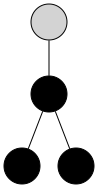

In [9]:
m = random_mobile(3)
print(m)
draw_tree_unlabelled(m,3,3)

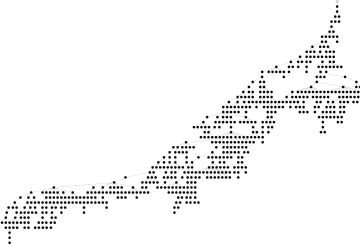

In [10]:
m = random_mobile(cmax)
#print(m)
draw_tree_unlabelled(m,5,20)

In [11]:
c = count_occurences(lambda : random_mobile_labelled(3),1000000)
print(100/9.)
#print(100/68.)

nb: 9
[3, [2, [1]]] 11.12
[3, [1, [2]]] 11.11
[2, [3, [1]]] 11.09
[1, [2], [3]] 11.09
[3, [1], [2]] 11.08
[1, [3, [2]]] 11.16
[1, [2, [3]]] 11.10
[2, [1, [3]]] 11.14
[2, [1], [3]] 11.10
11.11111111111111


1 10 19 28 37 46 55 64 73 82 91 100 109 118 127 136 145 154 163 172 181 190 199 208 217 226 235 244 253 262 271 280 289 298 307 316 325 334 343 352 361 370 379 388 397 406 415 424 433 442 451 460 469 478 487 496 505 514 523 532 541 550 559 568 577 586 595 

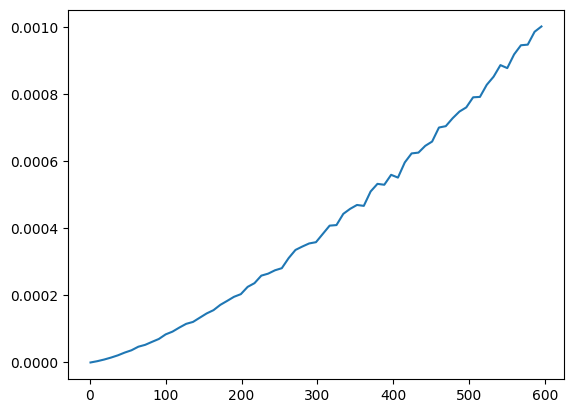

In [12]:
plot_time(random_mobile, cmax, nb_steps=60, nb=200)

In [13]:
def profiles(nb, size): # nombre de noeuds moyen à chaque hauteur
    heights = [0]
    def p(t,h):
        if h == len(heights):
            heights.append(1)
        else:
            heights[h]+=1
        if t!=():
            for st in t[1:]:
                p(st,h+1)
    for _ in range(nb):
        t = random_mobile(size)
        p(t,0)
    return [heights[i]/nb for i in range(len(heights))]

85


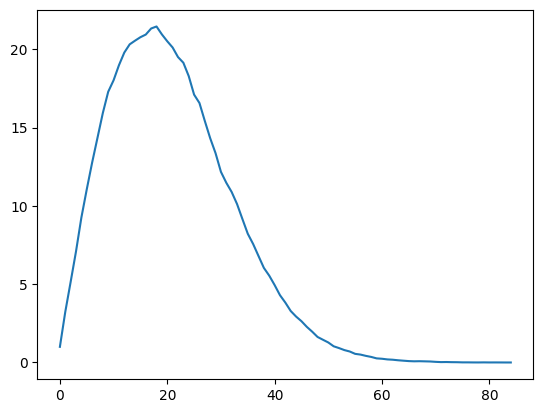

In [14]:
ps = profiles(1000,cmax)
print(len(ps))
plt.plot(ps)
plt.show()

### Boustrophédon

In [15]:
def cutC2(n): # ordre boustrophédon
    u = random.random()
    k,s1,s2 = 0,0,1-n * cM[n] * cS[0] / (n * cC[n])
    while(True):
        if u <= s1:
             return k
        if u > s2 :
            return n-k
        k += 1
        s1 += k * cM[k] * cS[n-k] / (n * cC[n])  # tC = tM x S
        s2 -= (n-k) * cM[n-k] * cS[k] / (n * cC[n])  # tC = tM x S

random_mobile2 = gen_mobile(cutC2,cutS)

In [16]:
random_mobile_labelled2 = gen_mobile_labelled(random_mobile2)

c = count_occurences(lambda : random_mobile_labelled2(3),100000)

nb: 9
[1, [2, [3]]] 11.11
[1, [2], [3]] 11.13
[3, [1], [2]] 10.97
[2, [3, [1]]] 10.98
[3, [1, [2]]] 11.04
[1, [3, [2]]] 11.08
[2, [1], [3]] 11.24
[2, [1, [3]]] 11.22
[3, [2, [1]]] 11.22


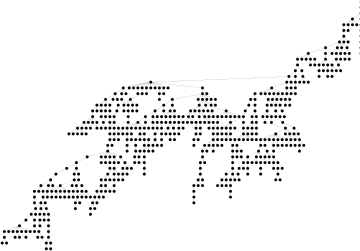

In [17]:
m = random_mobile2(cmax)
#print(m)
draw_tree_unlabelled(m,5,20)

1 10 19 28 37 46 55 64 73 82 91 100 109 118 127 136 145 154 163 172 181 190 199 208 217 226 235 244 253 262 271 280 289 298 307 316 325 334 343 352 361 370 379 388 397 406 415 424 433 442 451 460 469 478 487 496 505 514 523 532 541 550 559 568 577 586 595 

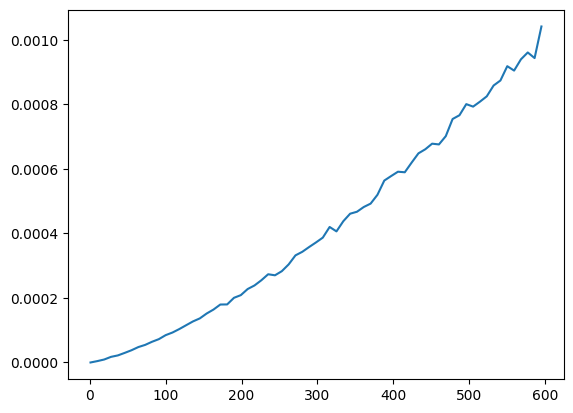

1 10 19 28 37 46 55 64 73 82 91 100 109 118 127 136 145 154 163 172 181 190 199 208 217 226 235 244 253 262 271 280 289 298 307 316 325 334 343 352 361 370 379 388 397 406 415 424 433 442 451 460 469 478 487 496 505 514 523 532 541 550 559 568 577 586 595 

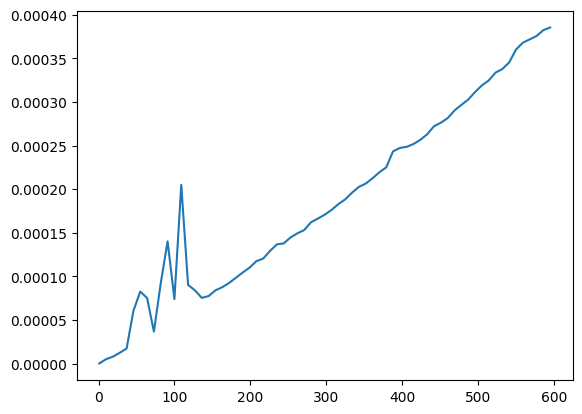

In [18]:
plot_time(random_mobile, cmax, nb_steps=60, nb=200)
plot_time(random_mobile2, cmax, nb_steps=60, nb=200)

### Et en changeant le sens du cut pour les structures pointées : "heuristque big-endian"

In [19]:
def cutC3(n) : # on parcourt l'intervalle en sens inverse
    u = random.random()
    k = n
    s = 1
    while True:
        s -= k * cM[k] * cS[n-k] / (n * cC[n])  # tC = tM x S
        if s<=u:
            return k
        k-=1

random_mobile3 = gen_mobile(cutC3, cutS)

In [20]:
random_mobile_labelled3 = gen_mobile_labelled(random_mobile3)

c = count_occurences(lambda : random_mobile_labelled3(3),1000000)

nb: 9
[3, [1], [2]] 11.08
[1, [3, [2]]] 11.12
[2, [1, [3]]] 11.18
[2, [1], [3]] 11.12
[2, [3, [1]]] 11.08
[1, [2], [3]] 11.09
[3, [2, [1]]] 11.11
[3, [1, [2]]] 11.10
[1, [2, [3]]] 11.10


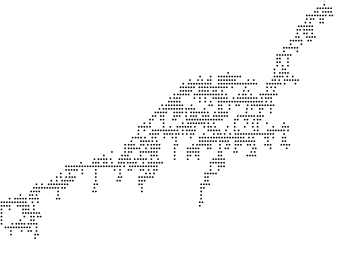

In [30]:
m = random_mobile3(cmax)
#print(m)
draw_tree_unlabelled(m,5,20)

1 10 19 28 37 46 55 64 73 82 91 100 109 118 127 136 145 154 163 172 181 190 199 208 217 226 235 244 253 262 271 280 289 298 307 316 325 334 343 352 361 370 379 388 397 406 415 424 433 442 451 460 469 478 487 496 505 514 523 532 541 550 559 568 577 586 595 

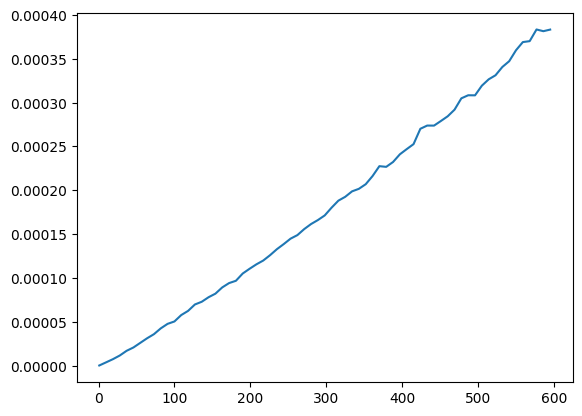

1 10 19 28 37 46 55 64 73 82 91 100 109 118 127 136 145 154 163 172 181 190 199 208 217 226 235 244 253 262 271 280 289 298 307 316 325 334 343 352 361 370 379 388 397 406 415 424 433 442 451 460 469 478 487 496 505 514 523 532 541 550 559 568 577 586 595 

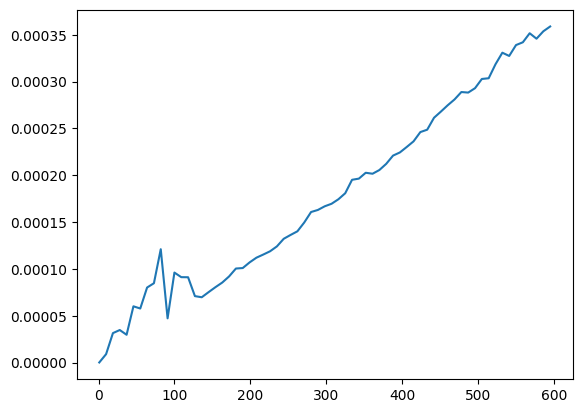

In [22]:
plot_time(random_mobile2, cmax, nb_steps=60, nb=200)
plot_time(random_mobile3, cmax, nb_steps=60, nb=200)

In [23]:
def cutS(n):
    u = 1.
    k,s = 0,0
    while u > s:
        k += 1
        s += cM[k] * cS[n-k] / cS[n]  # S = 1 + M x S 
        print(s)
    return k

def cutC(n):
    u = 1.
    k,s = 0,0
    while u > s:
        k += 1
        s += k * cM[k] * cS[n-k] / (n * cC[n])  # tC = tM x S
        print(s)
    return k

def cutC3(n) : # on parcourt l'intervalle en sens inverse
    u = 0
    k = n
    s = 1
    while True:
        s -= k * cM[k] * cS[n-k] / (n * cC[n])  # tC = tM x S
        if s<=u:
            return k
        k-=1
        print(s)

In [24]:
cutS(10)

0.3602843556091501
0.49163903901316186
0.5645197096832985
0.6163658073015267
0.6592707285458318
0.6988523202530115
0.7390245263928031
0.7842756263678916
0.8432086863509728
0.9999999999999999
2.4717934344229808e+294


11

In [25]:
cutC(10)

0.08492146805357204
0.14684384895474017
0.19837925522215338
0.24726116368187148
0.29782606945787937
0.35380396841473477
0.4200860000117411
0.5054139312659591
0.6304322314908393
1.0


10

In [26]:
cutC3(10)

0.6304322314908393
0.5054139312659591
0.4200860000117411
0.3538039684147347
0.2978260694578793
0.2472611636818714
0.1983792552221533
0.1468438489547401
0.08492146805357195


1

### avec des floattant en précision arbitraire... ?

In [27]:
from decimal import *
>>> getcontext().prec = 6
>>> Decimal(1) / Decimal(7)
Decimal('0.142857')
>>> getcontext().prec = 28
>>> Decimal(1) / Decimal(7)
Decimal('0.1428571428571428571428571429')

Decimal('0.1428571428571428571428571429')

In [28]:
# M = Z + Z x Cyc(M) => M = Z + Z x C, tC = S x tM, S = 1 + M x S 

cmax = 1000 
cM = [Decimal(0)]
cC = [Decimal(1)]
cS = [Decimal(1)]

for i in range(1,cmax+1):
    cM.append(Decimal(cC[i-1]))
    cC.append(sum(Decimal(cS[i-k]) * k * Decimal(cM[k]) / i for k in range(1,i+1)))
    cS.append(sum(Decimal(cS[i-k]) * Decimal(cM[k]) for k in range(1,i+1)))

print(cM[:8], cM[cmax])
print(cC[:8], cC[cmax])
print(cS[:8], cS[cmax])

[Decimal('0'), Decimal('1'), Decimal('1'), Decimal('1.5'), Decimal('2.833333333333333333333333333'), Decimal('6.083333333333333333333333332'), Decimal('14.11666666666666666666666666'), Decimal('34.49166666666666666666666666')] 3.586618822374957276222879093E+492
[Decimal('1'), Decimal('1'), Decimal('1.5'), Decimal('2.833333333333333333333333333'), Decimal('6.083333333333333333333333332'), Decimal('14.11666666666666666666666666'), Decimal('34.49166666666666666666666666'), Decimal('87.41785714285714285714285711')] 1.126728196965411247845589026E+493
[Decimal('1'), Decimal('1'), Decimal('2'), Decimal('4.5'), Decimal('10.83333333333333333333333333'), Decimal('27.24999999999999999999999999'), Decimal('70.69999999999999999999999998'), Decimal('187.7250000000000000000000001')] 3.532040185178327746984601473E+493


1 17 33 49 65 81 97 113 129 145 161 177 193 209 225 241 257 273 289 305 321 337 353 369 385 401 417 433 449 465 481 497 513 529 545 561 577 593 609 625 641 657 673 689 705 721 737 753 769 785 801 817 833 849 865 881 897 913 929 945 961 977 993 

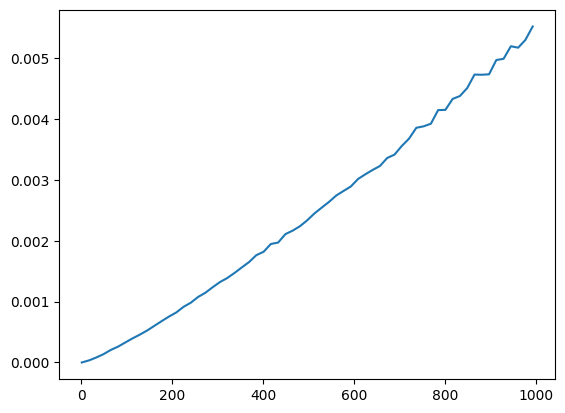

1 17 33 49 65 81 97 113 129 145 161 177 193 209 225 241 257 273 289 305 321 337 353 369 385 401 417 433 449 465 481 497 513 529 545 561 577 593 609 625 641 657 673 689 705 721 737 753 769 785 801 817 833 849 865 881 897 913 929 945 961 977 993 

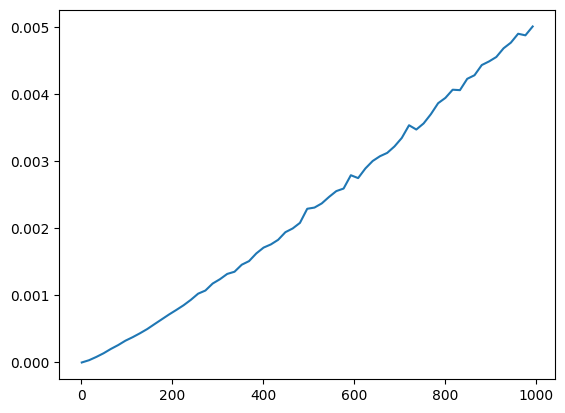

In [29]:
plot_time(random_mobile2, cmax, nb_steps=60, nb=200)
plot_time(random_mobile3, cmax, nb_steps=60, nb=200)